# SMAI ASSIGNMENT 2 - Problem 2
## Srujana Vanka - 2020102005


## GMM - Customer dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.mixture import GaussianMixture

In [11]:
# GMM class
class GMMClassifier:
    def __init__(self, n_components):
        self.n_components = n_components
        self.gmm = GaussianMixture(n_components=n_components)
        self.params = None
        self.likelihoods = None
        self.membership_values = None

    # Store the parameters
    def fit(self, data):
        self.gmm.fit(data)
        self.params = {
            "weights": self.gmm.weights_,
            "means": self.gmm.means_,
            "covariances": self.gmm.covariances_
        }

    # Calculate likelihoods 
    def calculate_likelihoods(self, data):
        self.likelihoods = self.gmm.score_samples(data)

    # Calculate membership values 
    def calculate_membership_values(self, data):
        self.membership_values = self.gmm.predict_proba(data)


### Find the parameters of GMM associated with the customer-dataset, using the EM method. Vary the number of components, and observe the results.

In [27]:
# Load dataset
customer_data = pd.read_csv('/home/sruj/Downloads/SMAI-Dataset-customer-dataset/data.csv')

customer_data.head()


,Index,Gender,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0,67,2,124670,1,2
1,1,1,1,22,1,150773,1,2
2,2,0,0,49,1,89210,0,0
3,3,0,0,45,1,171565,1,1
4,4,0,0,53,1,149031,1,1


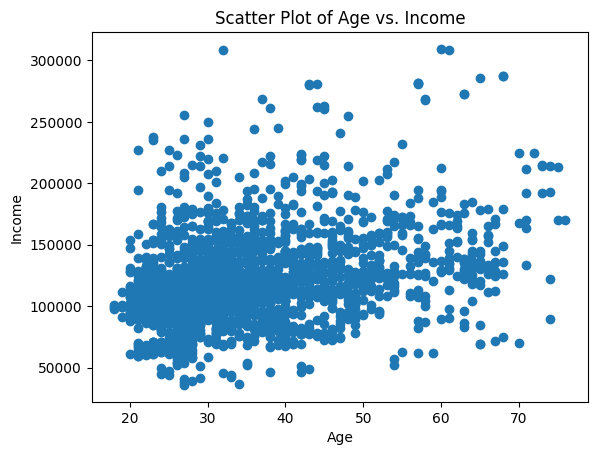

In [26]:
selected_features = customer_data[['Age', 'Income']]

# Scatter plot of 'Age' vs. 'Income'
plt.scatter(selected_features['Age'], selected_features['Income'])
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


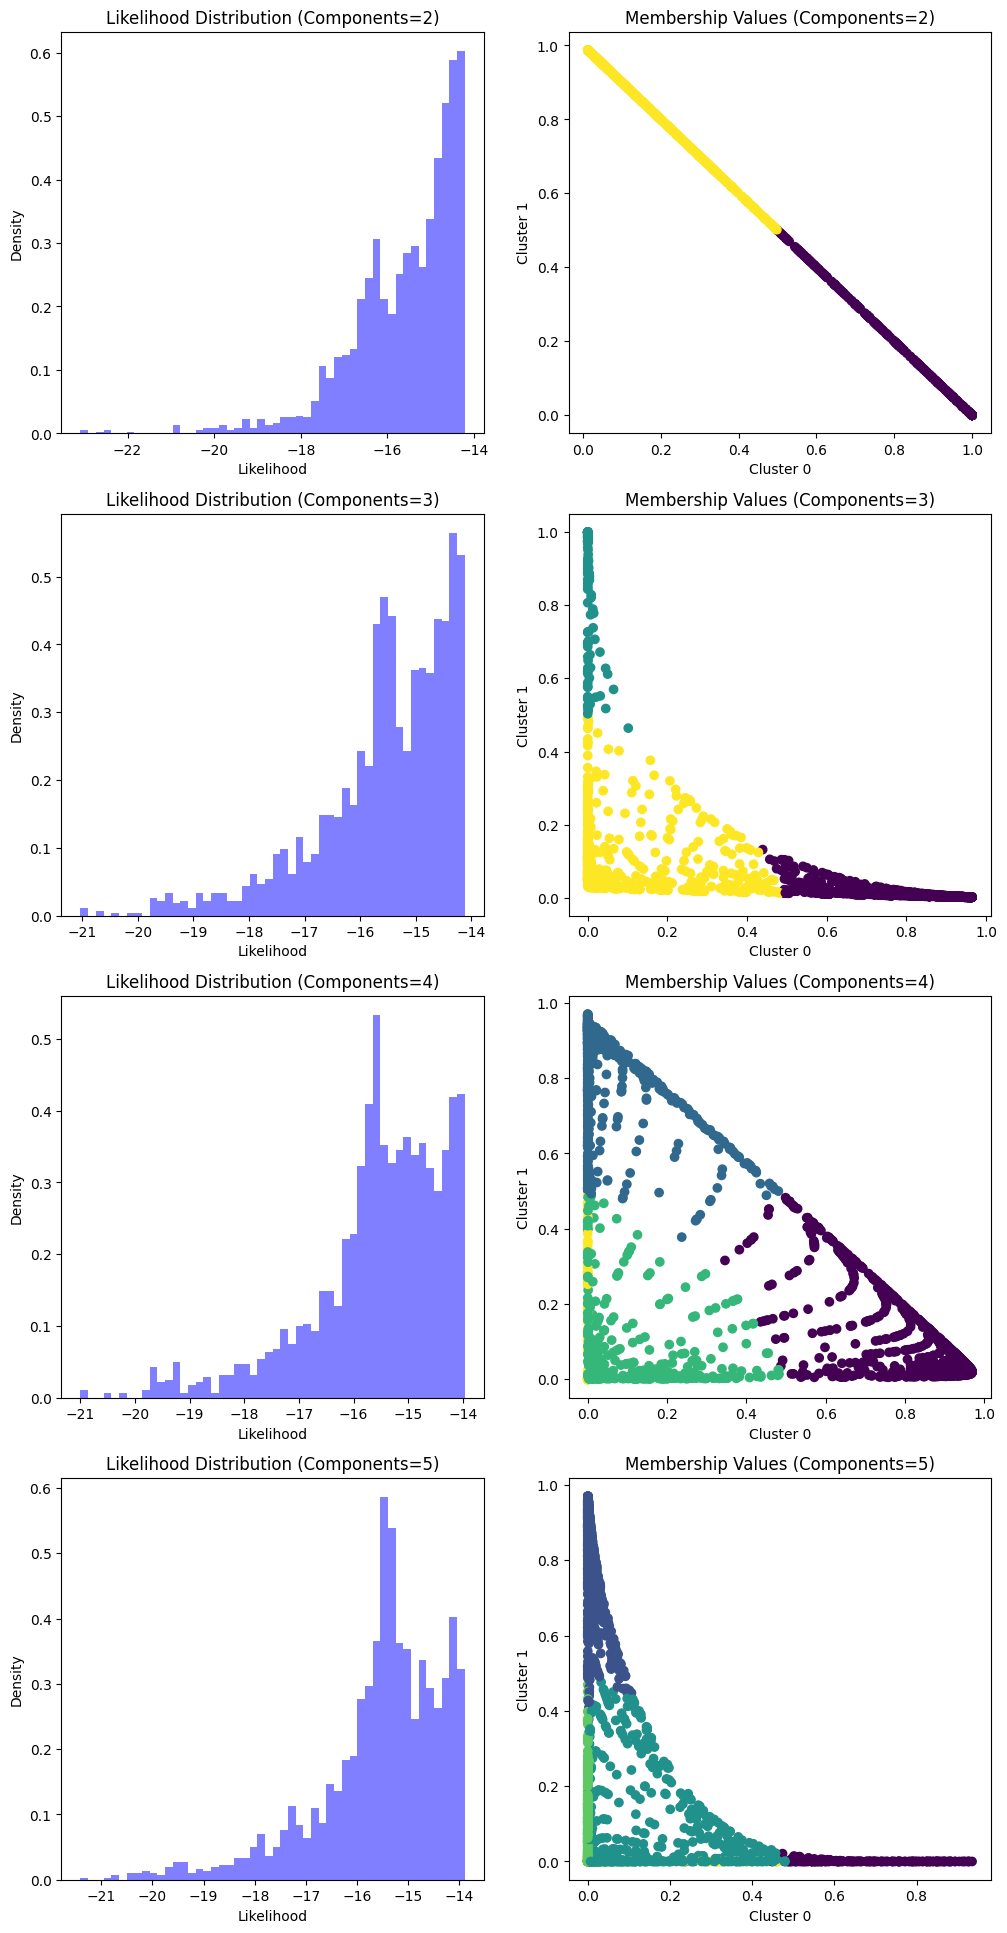

In [28]:
def plot_likelihood(likelihoods, num_components, ax):
    ax.hist(likelihoods, bins=50, density=True, alpha=0.5, color='b')
    ax.set_title(f"Likelihood Distribution (Components={num_components})")
    ax.set_xlabel("Likelihood")
    ax.set_ylabel("Density")

def plot_membership_val(membership_values, num_components, ax):
    scatter = ax.scatter(
        membership_values[:, 0],
        membership_values[:, 1],
        c=np.argmax(membership_values, axis=1),
        cmap='viridis'
    )
    ax.set_title(f"Membership Values (Components={num_components})")
    ax.set_xlabel("Cluster 0")
    ax.set_ylabel("Cluster 1")
    return scatter


# Define the list of components to vary
num_components_list = [2, 3, 4, 5]

# Create subplots
fig, axes = plt.subplots(len(num_components_list), 2, figsize=(12, 6 * len(num_components_list)))

for i, num_components in enumerate(num_components_list):
    # Instantiate and fit the GMM model
    gmm = GMMClassifier(n_components=num_components)
    gmm.fit(selected_features)

    # Calculate likelihoods and plot in the first column
    gmm.calculate_likelihoods(selected_features)
    ax_likelihood = axes[i, 0]
    plot_likelihood(gmm.likelihoods, num_components, ax_likelihood)

    # Calculate membership values and plot in the second column
    gmm.calculate_membership_values(selected_features)
    ax_membership = axes[i, 1]
    plot_membership_val(gmm.membership_values, num_components, ax_membership)

plt.show()


## Wine-dataset 

In [5]:
# Load the Wine dataset
from sklearn.datasets import load_wine
from sklearn import datasets, mixture

wine = load_wine()
X = wine.data
y = wine.target

### Perform clustering on the wine-dataset using Gaussian Mixture Model (GMM) and K-Means algorithms.

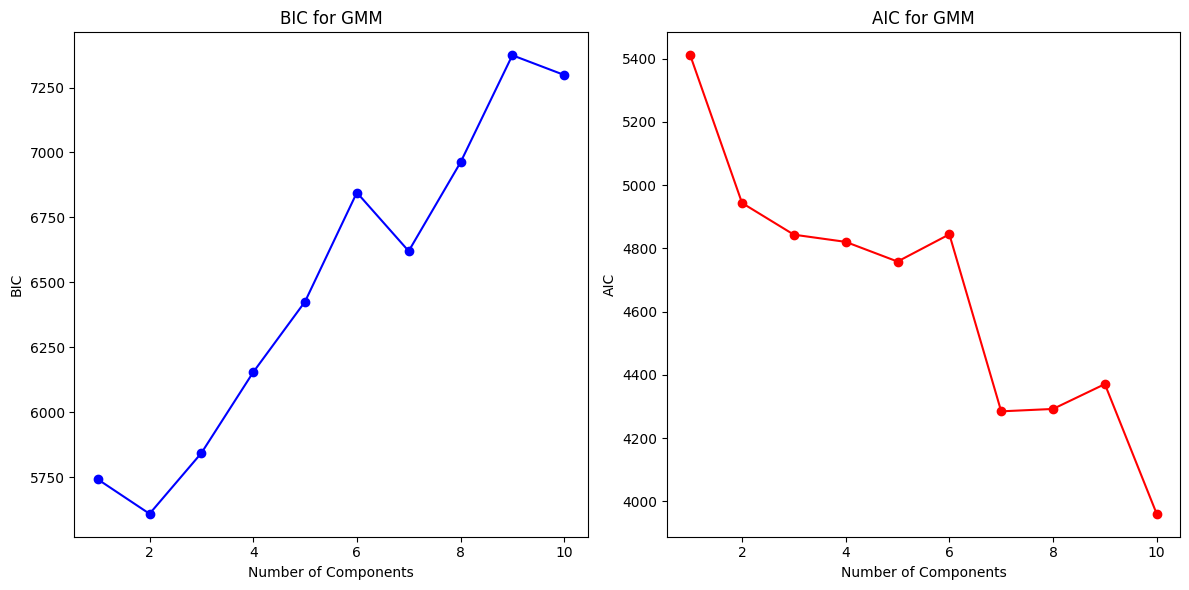

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Determine the optimal number of clusters for GMM using BIC and AIC
n_components_range = range(1, 11)
bic = []
aic = []

for n_components in n_components_range:
    gmm_classifier = GMMClassifier(n_components=n_components)
    gmm_classifier.fit(X_std)
    gmm_classifier.calculate_membership_values(X_std)  # Calculate membership values
    bic.append(gmm_classifier.gmm.bic(X_std))
    aic.append(gmm_classifier.gmm.aic(X_std))

# Plot BIC and AIC values to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, bic, marker='o', linestyle='-', color='b')
plt.title('BIC for GMM')
plt.xlabel('Number of Components')
plt.ylabel('BIC')

plt.subplot(1, 2, 2)
plt.plot(n_components_range, aic, marker='o', linestyle='-', color='r')
plt.title('AIC for GMM')
plt.xlabel('Number of Components')
plt.ylabel('AIC')

plt.tight_layout()
plt.show()


### Observations

**BIC:** It includes a penalty term for model complexity, which is proportional to the number of parameters in the model. In the case of GMMs, the number of parameters increases with the number of components.
As you increase the number of components in a GMM, the model becomes more complex because you are adding more parameters to estimate (means, covariances, and weights for each component). This increased complexity results in a larger penalty term in BIC.
BIC aims to strike a balance between model fit and model complexity. When the model complexity increases significantly (such as adding more components), BIC penalizes this increase in complexity, leading to higher BIC values.

**AIC:** It also includes a penalty term for model complexity, but it is generally less strict than BIC. AIC tends to favor more complex models compared to BIC.
As you increase the number of components in a GMM, AIC becomes more lenient in penalizing the increase in complexity. This means that AIC is willing to accept more complex models as long as they provide a better fit to the data.
When adding components improves the fit significantly, AIC may prefer a model with more components.

In [15]:
# Based on BIC and AIC, choose the optimal number of components
optimal_n_components_bic = n_components_range[np.argmin(bic)]
optimal_n_components_aic = n_components_range[np.argmin(aic)]

print(f'Optimal number of components (BIC): {optimal_n_components_bic}')
print(f'Optimal number of components (AIC): {optimal_n_components_aic}')


Optimal number of components (BIC): 2
Optimal number of components (AIC): 10


/home/sruj/jupyter/environment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


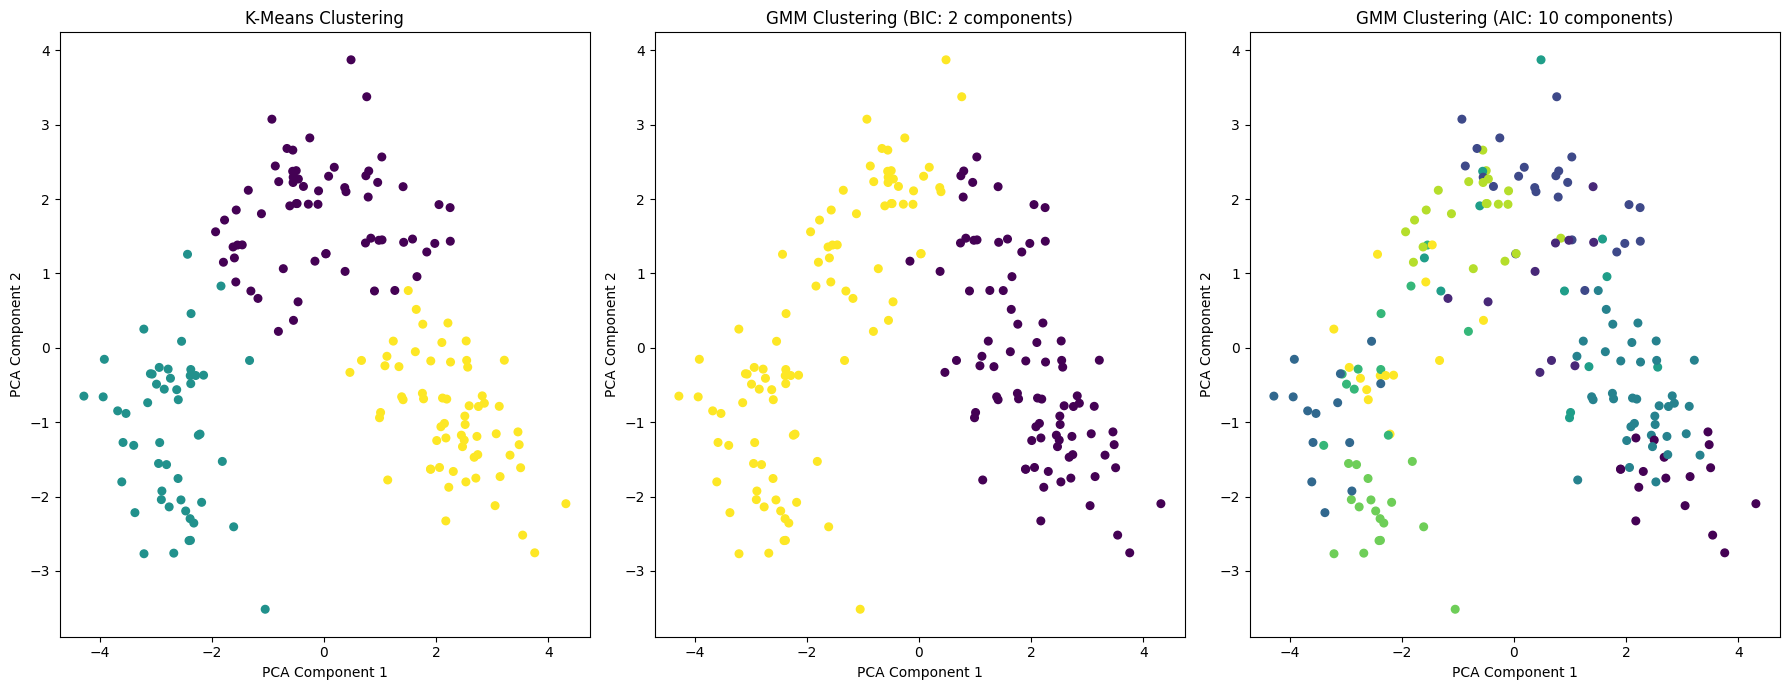

In [22]:
# Apply K-Means clustering with a chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_std)

# Apply GMM clustering with the optimal number of components (BIC)
gmm_classifier_bic = GMMClassifier(n_components=optimal_n_components_bic)
gmm_classifier_bic.fit(X_std)
gmm_labels_bic = gmm_classifier_bic.gmm.predict(X_std)  # Use the predict method

# Apply GMM clustering with the optimal number of components (AIC)
gmm_classifier_aic = GMMClassifier(n_components=optimal_n_components_aic)
gmm_classifier_aic.fit(X_std)
gmm_labels_aic = gmm_classifier_aic.gmm.predict(X_std)  # Use the predict method

# Plot the clustering results
plt.figure(figsize=(18, 7))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels_bic, cmap='viridis', s=30)
plt.title(f'GMM Clustering (BIC: {optimal_n_components_bic} components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels_aic, cmap='viridis', s=30)
plt.title(f'GMM Clustering (AIC: {optimal_n_components_aic} components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


In [23]:

# Compute and compare Silhouette Scores
kmeans_silhouette = silhouette_score(X_std, kmeans_labels)
gmm_silhouette_bic = silhouette_score(X_std, gmm_labels_bic)
gmm_silhouette_aic = silhouette_score(X_std, gmm_labels_aic)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"GMM Silhouette Score (BIC): {gmm_silhouette_bic:.3f}")
print(f"GMM Silhouette Score (AIC): {gmm_silhouette_aic:.3f}")

K-Means Silhouette Score: 0.285
GMM Silhouette Score (BIC): 0.258
GMM Silhouette Score (AIC): 0.114


### Observations 
K-Means Silhouette Score (0.285): The K-Means clustering has a relatively higher silhouette score of 0.285. This suggests that the data points in K-Means clusters are reasonably well-separated from each other, and the clustering is relatively meaningful. 

GMM Silhouette Score (BIC) (0.258): This score is slightly lower than K-Means, indicating that the GMM clusters may have slightly less separation compared to K-Means. 

GMM Silhouette Score (AIC) (0.114): The GMM clustering based on AIC has the lowest silhouette score of 0.114 among the three methods. This score indicates that the clustering based on AIC may have more overlap or less separation between clusters compared to K-Means and GMM with BIC. 

**Therefore, 
K-Means appears to provide the best clustering results among the three methods.
GMM with BIC also provides reasonable clustering results, though slightly lower than K-Means.
GMM with AIC has the lowest silhouette score, suggesting that it may not be as effective in separating the data into distinct clusters.**